# Einen Einzelpunkt zufällig verschieben

Um die Monte Carlo Simulation in Angriff zu nehmen, müssen wir als erstes einen Weg finden, wie wir Punkte zufällig verschieben können, zum Beispiel um 100m. Bei *GeoDataFrames* handelt es sich bei den Punkten um `Point()`-Objekte des Modules `shapely.geometry`. Wir importieren also genau diese *Function* und bei der Gelegenheit auch `geopandas`:

! AB DIESER STELLE WIRD GEOPANDAS BENÖTIGT!

In [1]:
import geopandas as gpd
from shapely.geometry import Point

Als erster Schritt kreieren wir einen "Testpunkt" und entwickeln eine Methode, diesen zufällig zu verschieben (was wir mit einem Punkt schaffen, schaffen wir es auch mit Tausend Punkten). Beispielsweise können wir den Testpunkt mit den Koordinaten der alten Sternwarte Bern (bzw. deren Gedenktafel, s.u.) erstellen.

In [2]:
sternwarte = Point(2600000,1200000)
print(sternwarte)

POINT (2600000 1200000)


Dieser konstruierte Punkt liegt im neuen Schweizer Koordinatensystem (CH1903+ LV95) auf der alten Sternwarte in Bern, bzw. auf deren Gedenktafel.

```{figure} sternwarte.jpg
Links: Koordinatensystem der Schweiz, mit dem (alten) Referenzwert Sternwarte Bern. Quelle: lv95.bve.be.ch
rechts: Gedenktafel an die Alte Sternwarte Bern. Quelle: aiub.unibe.ch 
```

## Übung 1

Wenn wir die Position eines Punktes verschieben wollen, dann müssen wir die Koordinaten wissen. Wir suchen also nach einem Weg, wie wir die x,y-Werte unseres Punktes `sternwarte` zurückerhalten. Erstelle den Punkt `sternwarte`. Versuche herauszufinden, wie das geht. Ich empfehle dazu folgende Schritte:

1. Finde heraus, um was für einen Datentyp es sich beim Punkt handelt, nutze dafür `type()`
2. Recherchier diesen Datentyp im Internet
3. Finde heraus, was für *Attributes* und *Methods* mit dem Datentyp assoziiert sind

Wenn du die `x` und `y` Koordinaten hast, weise sie den Variabeln `x_alt`, resp. `y_alt` zu.
Hinweis: Die Antwort ist verblüffend einfach. Verbringe nicht allzu viel Zeit mit dieser Übung. Frage mich oder deine Nachbarn, wenn du hier nicht weiterkommst.

In [5]:
# Schritt 1
type(sternwarte)

shapely.geometry.point.Point

In [6]:
# Schritt 2
# Es handelt sich offenbar um ein "Shapely" objekt https://shapely.readthedocs.io/en/latest/manual.html

In [11]:
# Schritt 3
# Es sind diverse Methods mit diesem Datentyp assoziiert: https://shapely.readthedocs.io/en/latest/manual.html#general-attributes-and-methods
sternwarte.geom_type

# Punkt objekte haben x, y und evt. z Koordinaten: https://shapely.readthedocs.io/en/latest/manual.html#points
sternwarte.x
sternwarte.y

1200000.0

## Übung 2: Zufallswert addieren

Jetzt, wo wir die Koordinaten aus extrahieren können weisen wir sie zwei neuen Variabeln zu: `x_alt`, `y_alt`. Danach müssen wir eine Zufallswert zwischen -100 und 100 generieren, den wir zu `x_alt` resp. `y_alt` addieren können (das Koordinatensystem ist ja in Metern).  Wenn ich nach «Python random number» im Internet suche dann ist mein erstes Resultat bereits die Funktion `randrange` aus dem Modul `random`.

Importiere dieses Modul und nutze die genannte Funktion um einen Versatz je für `x` und `y` zu generieren. Addiere diese beiden Zahlen zu `x_alt` resp. `y_alt` und speichere die Outputs als `x_neu` und `y_neu`. 
Nun können wir wieder `Point()` verwenden um aus `x_neu`, `y_neu` eine neue Punkt-Geometrie zu erstellen. Speichere diese neue Geometrie unter der Variabel `sternwarte_neu`.


In [14]:
x_alt = sternwarte.x
y_alt = sternwarte.y

import random

x_neu = x_alt + random.randrange(-100,100)
y_neu = y_alt + random.randrange(-100,100)

sternwarte_neu = Point(x_neu, y_neu)
print(sternwarte_neu)

POINT (2599934 1199922)


## Übung 3: Arbeitsschritte in eine *Function* verwandeln

Jetzt sind die Einzelschritte zur Verschiebung eines Punktes klar. Da wir dies für viele Punkte machen müssen, ist es sinnvoll, aus den Arbeitsschritten eine *Function* zu erstellen. Erstelle eine Function `point_offset` welche als Input ein `Point()`-Objekt nimmt und ein leicht verschobenes `Point()`-Objekt zurück gibt. Wenn du möchtest kannst du die Distanz der Verschiebung als optionalen Parameter (wichtig!) definieren. 

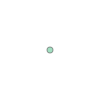

In [16]:
def point_offset(point, distance = 100):
    x_alt = point.x
    y_alt = point.y

    distance = int(distance)

    x_neu = x_alt + random.randrange(-distance,distance)
    y_neu = y_alt + random.randrange(-distance,distance)

    point_off = Point(x_neu, y_neu)

    return(point_off)

point_offset(sternwarte, 100)

## Output visualisieren

Nun ist es wichtig, dass wir unsere Function visuell überprüfen. Wir wenden die Function 1'000 mal auf den Punkt `sternwarte` an und schauen mal wie die Punkte verteilt werden. Für diesen Schritt gebe ich euch den fertigen Code, da ihr die dafür benötigten Techniken noch nicht gelernt habt. Füge diesen Code in dein Script ein und führe ihn aus. Allenfalls musst du den Code leicht an deine Situation anpassen.

<AxesSubplot:>

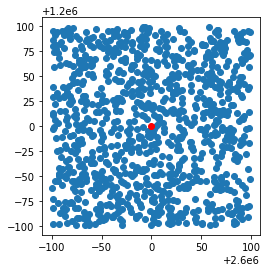

In [19]:
ax = gpd.GeoSeries([point_offset(sternwarte) for x in range(1,1000)]).plot()
gpd.GeoSeries(sternwarte).plot(ax = ax, color = "red")

## Optionale Übung für *Hoch*motivierte (sehr anspruchsvoll)

Wie in der obigen Grafik ersichtlich ist die Verteilung der Punkte bei unserer Herangehensweise Quadratisch. Im Extremfall liegt ein Punkt 100m östlich und 100m nördlich vom Ursprungspunkt entfernt, die euklidische Distanz zum Ursprungspunkt beträgt dann 141 Meter ($\sqrt{100^2+100^2}$). Wen das auch stört, der kann eine alternative Methode entwickeln den Punkt um maximal 100m zu verschieben. Tipps dazu könnt ihr gerne bei uns abholen. 

<AxesSubplot:>

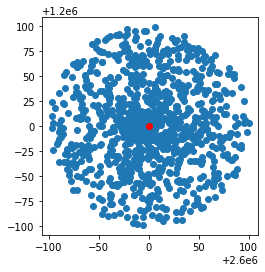

In [21]:
def point_offset2(point,distance, distribution = "uniform"):
    import random
    import math
    import shapely
    x = point.x
    y = point.y
    # Ein Winkel von 360 wird in Radians konvertiert
    rad = math.radians(random.uniform(0,360))
    # zwei Varianten: "uniforme Verteilung oder Normalverteilung"
    if distribution == "uniform":
        offdist = random.randrange(-distance,distance)
    if distribution == "normal":
        offdist = random.normalvariate(mu = 0, sigma = distance/2)
    # Mit der Cosinusfunktion, dem Winkel (in Radians) und der Distanz wird der y_offset bestimmt
    y_offset = math.cos(rad)*offdist
    # Mit der Sinusfunktion wird der x_offset bestimmt
    x_offset = math.sin(rad)*offdist
    x_neu = x+x_offset
    y_neu = y+y_offset
    point_off = Point(x_neu, y_neu)
    return(point_off)

ax = gpd.GeoSeries([point_offset2(sternwarte,100, "uniform") for x in range(1000)]).plot()
gpd.GeoSeries(sternwarte).plot(ax = ax, color = "red")

<AxesSubplot:>

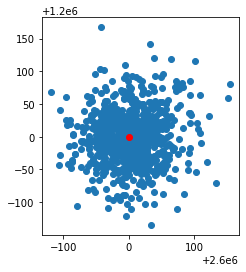

In [22]:
ax = gpd.GeoSeries([point_offset2(sternwarte,100, "normal") for x in range(1000)]).plot()
gpd.GeoSeries(sternwarte).plot(ax = ax, color = "red")